In [33]:
import numpy as np
import os
import glob
import allantools
import matplotlib.pyplot as plt
from tqdm import tqdm
import random 
import counts_statistics_qpe as cs
import phase_estimation_functions as qpe
from densitymatrix import DM
import shutil
from collections import defaultdict

SENSING 30 ATTACK 

In [38]:
"""
DEFINING FOLDERS AND DIRECTORIES
"""

data_dir = [r"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\GHZ\with_Certification",
            r"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Plus\with_Certification"]

os.chdir(data_dir[0])
filenames_GHZ = [i for i in glob.glob("COMPLETE_*")]

os.chdir(data_dir[1])
filenames_Plus = [i for i in glob.glob("QPE_*")]

input_state = ('GHZ','Plus')
n_qubits = 4


# Defining the stabilizers we want to stabilize and respective signs
stabilizers = [ "iiii", "zzii", "izzi", "iizz", "xxxx", "zizi", "iziz", "zzzz", "xyyx", "yxyx", "xxyy", "yyxx", "ziiz", "yxxy", "xyxy", "yyyy"]
#stabilizers = ["xxxx", "yyxx", "xyyx", "xxyy"]
stab_sign = [1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , -1 , -1 , -1 , -1 , 1 , -1 , -1 , 1 ]
#stab_sign = [1 , -1, -1 , -1]
STABILIZER_TO_INDEX = {stab: i for i, stab in enumerate(stabilizers)}   

def sorting_index(filename: str):
    x, y = filename[:-len(".txt")].split("_")[1:]
    return int(y), int(x)



In [40]:
"""
CALCULATING THE STATISTICS OBTAINED FROM THE XXXX MEASUREMENTS
"""


#Ordering the files : 
order = ['FIRST', 'SECOND', 'THIRD', 'FOURTH', 'FIFTH', 'SIXTH']

# Fonction pour extraire l’ordre à partir du nom
def sort_key(item):
    for index, keyword in enumerate(order):
        if keyword in item:
            return index
    return len(order)  # En cas d'élément non reconnu, le mettre à la fin

# Tri de la liste
filenames_GHZ = sorted(filenames_GHZ, key=sort_key)
ROUND_TO_FILES_Plus = {}
ROUND_TO_FILES_GHZ = {}
files_GHZ = []
files_Plus = []
for index, file in enumerate(filenames_GHZ):
    file_dir = f"{data_dir[0]}\{file}\counts"
    os.chdir(file_dir)
    files_GHZ.append([i for i in glob.glob("ABCD=*.txt")])
    ### This assumes the label is of the form: "PhaseEstimation=xxxx_{index}_{theta_4}"
    files_GHZ[index].sort(key = sorting_index)

    n_rounds = sorting_index(files_GHZ[index][-1])[0] + 1
    ROUND_TO_FILES = defaultdict(list)

    for f in files_GHZ[index]:
        round_ = sorting_index(f)[0]
        ROUND_TO_FILES[round_].append(f)
        
    ROUND_TO_FILES_GHZ[file] = ROUND_TO_FILES

for index, file in enumerate(filenames_Plus):
    file_dir = f"{data_dir[1]}\{file}\counts"
    os.chdir(file_dir)
    files_Plus.append([i for i in glob.glob("ABCD=*.txt")])
    ### This assumes the label is of the form: "PhaseEstimation=xxxx_{index}_{theta_4}"
    files_Plus[index].sort(key = sorting_index)
    n_rounds = sorting_index(files_Plus[index][-1])[0] + 1
    ROUND_TO_FILES = defaultdict(list)

    for f in files_Plus[index]:
        round_ = sorting_index(f)[0]
        ROUND_TO_FILES[round_].append(f)
    
    ROUND_TO_FILES_Plus[file] = ROUND_TO_FILES

In [42]:
"""
CALCULATING THE STATISTICS OBTAINED FROM THE XXXX MEASUREMENTS
"""
#Ordering the files : 
order = ['FIRST', 'SECOND', 'THIRD', 'FOURTH', 'FIFTH', 'SIXTH']

# Fonction pour extraire l’ordre à partir du nom
def sort_key(item):
    for index, keyword in enumerate(order):
        if keyword in item:
            return index
    return len(order)  # En cas d'élément non reconnu, le mettre à la fin

# Tri de la liste
filenames_GHZ = sorted(filenames_GHZ, key=sort_key)

In [43]:

round = 30
New_dir = [r'C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Attack\with_Certification\Plus\RUN_1\counts',
           r'C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Attack\with_Certification\Plus\RUN_2\counts',
           r'C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Attack\with_Certification\Plus\RUN_3\counts']
nu = []
List_Files = []
ROUND_TO_FILES = defaultdict(list)

# Cleaning the file in the folder 

for index in range(len(New_dir)):
    os.chdir(New_dir[index])
    files = [i for i in glob.glob("ABCD=*.txt")]
    for f in files: 
        os.remove(f)

print('Finish cleaning')

for w in range(len(filenames_Plus)):
    for z in range(round):
        nu.append(random.choices(population = [0,1],weights = [0.80,0.20],k = 10000))
        for i in range(len(nu[0])):
            if nu[w][i] == 0:
                file_dir = f"{data_dir[0]}\{filenames_GHZ[w]}\counts"
                os.chdir(file_dir)
                ROUND_TO_FILES[z].append(ROUND_TO_FILES_GHZ[f'{filenames_GHZ[w]}'][z][i])
                shutil.copy(f"{data_dir[0]}\{filenames_GHZ[w]}\counts\{ROUND_TO_FILES_GHZ[f'{filenames_GHZ[w]}'][z][i]}",New_dir[w])
            if nu[w][i] == 1:
                file_dir = f"{data_dir[1]}\{filenames_Plus[w]}\counts"
                os.chdir(file_dir)
                ROUND_TO_FILES[z].append(ROUND_TO_FILES_Plus[f'{filenames_Plus[w]}'][z][i])
                shutil.copy(f"{data_dir[1]}\{filenames_Plus[w]}\counts\{ROUND_TO_FILES_Plus[f'{filenames_Plus[w]}'][z][i]}",New_dir[w])

Finish cleaning


In [44]:
os.chdir(r'C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Attack\with_Certification\Plus')
with open("nu.txt",'w') as f: 
    f.write(f'{nu}')

In [ ]:
New_dir = r'C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Attack\with_Certification\Plus'
os.chdir(New_dir)
filenames = [i for i in glob.glob("RUN*")]

n_rounds =10000
p_pass = np.zeros((len(filenames), n_rounds))
p_pass_error = np.zeros((len(filenames), n_rounds))

stats_list = []

for index, file in enumerate(filenames):
    file_dir = f"{New_dir}\{file}\counts"
    os.chdir(file_dir)
    files = [i for i in glob.glob("ABCD=*.txt")]
    files.sort(key = sorting_index)

    n_rounds = sorting_index(files[-1])[0] + 1
    ROUND_TO_FILES = defaultdict(list)
    for f in files:
         round_ = sorting_index(f)[0]
         ROUND_TO_FILES[round_].append(f)

    for i in tqdm(range(n_rounds)):
        writting_dir = f"{New_dir}\{file}\\verif_Plus_80_20\\v_round={i}"
        os.makedirs(f"{writting_dir}", exist_ok=True)

        stats = cs.Operartors_Statistics(n_qubits, stabilizers, stab_sign, STABILIZER_TO_INDEX, ROUND_TO_FILES[i], file_dir)
        samples_evolution = np.arange(1, stats.n_loops+1, 1)
        p_pass_list, n_samples_list = stats.get_pass_prob_evolution(samples_evolution,writting_dir)

  7%|▋         | 2/30 [04:44<1:06:25, 142.34s/it]

In [ ]:
"""
Reading and analysing the verification stats files

Set verif_type = "stats_verif" to load the evolution of the failure rate with 16 stabilizers
OR Set verif_type = "stats_originalverif" to load the evolution of the failure rate with 4 stabilizers
""" 

verif_type = "verif_Plus_80_20" # You should switch to "stats_originalverif" for the 4 original stabilizers

n_rounds=30
qtys = ["n_samples", "n_samples_error", "p_pass", "p_pass_error"]
samples_evolution = np.arange(1, 1e4, 1)
p_fail_evolution = np.zeros((len(filenames), n_rounds, int(1e4)))
n_samples_evolution = np.zeros((len(filenames), n_rounds, int(1e4)))


for index, file in enumerate(filenames):
    for i in tqdm(range(n_rounds)):
        stats_dir = f"{New_dir}\{file}\{verif_type}\\v_round={i}"
        for qty in qtys:
            with open(f"{stats_dir}\\{qty}.txt", "r") as f:
                # It reads each qtys.txt file and writes its content as variable qtys[i]_list;
                # eg.: p_pass_list and n_samples_list used bellow in the cell are defined here
                var_name = f"{qty}_list"
                locals()[var_name] = list(map(float,list(f.read().strip("[").strip("]").split(","))))
        p_fail_evolution[index][i] = 1 - np.array(p_pass_list, dtype=float)
        n_samples_evolution[index][i] = np.array(n_samples_list, dtype=float)

100%|██████████| 30/30 [00:01<00:00, 22.75it/s]


C:\Users\QILIP6\AppData\Local\Temp\ipykernel_40196\701475745.py:39: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


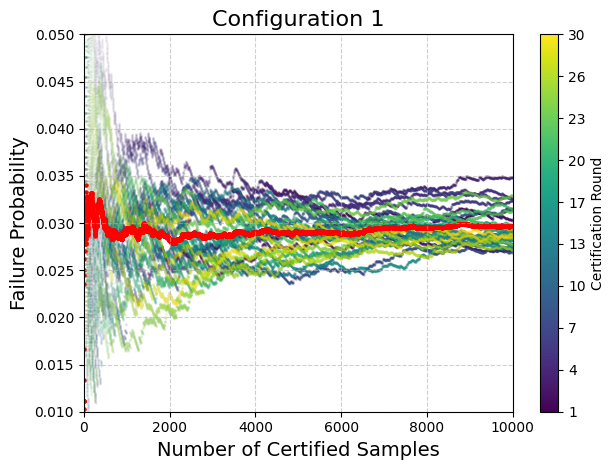

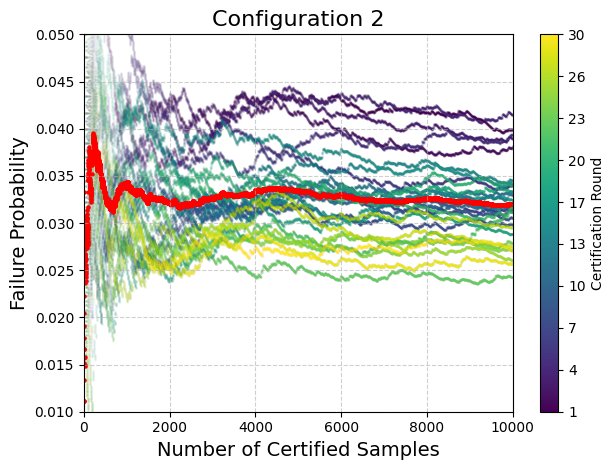

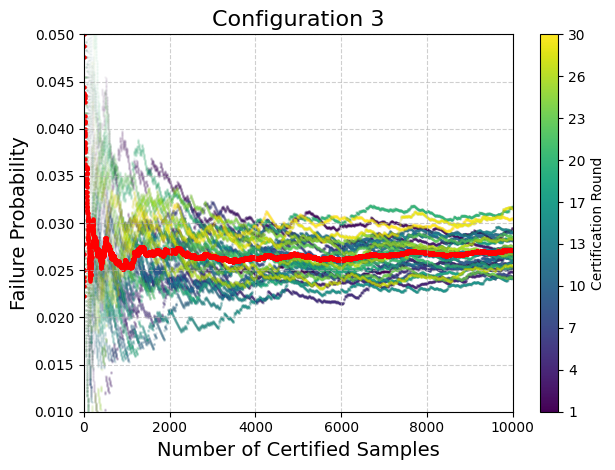

Mean Final failure probabilities [0.0297, 0.032, 0.0272]


In [32]:
import matplotlib as mpl
cmap = mpl.colormaps['viridis']
colors = cmap(np.linspace(0, 1, n_rounds))

############# Plotting the failure rate ##############
final_p_fail_mean = []
for index, file in enumerate(filenames):
    for i in range(n_rounds):
        ### Plotting the failure rate evolution for each verification round
        ### There is something weird with the dimensions
        x_data = n_samples_evolution[index][i]
        y_data = p_fail_evolution[index][i]

        plt.scatter(x_data, y_data,
                    s = 1,  # Increase scatter size
                    alpha = 0.03,  # Reduce point opacity for clarity
                    label = f"Dataset {i + 1}",
                    color = colors[i])  # Dynamic legend labels
        
    final_p_fail_mean.append(np.round(np.average(p_fail_evolution[index], axis = 0)[-1], 4))

    ### Plotting the mean failure rate evolution over all verification rounds
    p_fail_average_evolution = np.average(p_fail_evolution[index], axis=0)
    y_data_average = p_fail_average_evolution[:-1]
    x_data = np.arange(0, len(y_data_average))
    plt.scatter(x_data, y_data_average,
                s=5,  # Increase scatter size
                alpha=1,  # Reduce point opacity for clarity
                color = 'r',
                label=f"Dataset {i + 1}")  # Dynamic legend labels

    # Customize plot
    # Create a ScalarMappable to serve as the colorbar
    norm = mpl.colors.Normalize(vmin=1, vmax=n_rounds)  # Normalize to match the rounds
    sm = mpl.cm.ScalarMappable(cmap='viridis', norm=norm)
    sm.set_array([])  # Required for the colorbar

    # Add the colorbar
    cbar = plt.colorbar(sm)
    cbar.set_label("Certification Round")  # Label for colorbar
    cbar.set_ticks(np.linspace(1, n_rounds, min(n_rounds, 10)))  # Adjust ticks for clarity
    cbar.set_ticklabels([f"{int(i)}" for i in np.linspace(1, n_rounds, min(n_rounds, 10))])  # Custom labels

    plt.xlim(0, 10000)  # Refine x-axis limits
    plt.ylim(0.01, 0.05)
    # plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)  # Light gridlines
    plt.xlabel("Number of Certified Samples", fontsize=14)  # X-axis label
    plt.ylabel("Failure Probability", fontsize=14)  # Y-axis label
    plt.title(f"Configuration {index+1}", fontsize=16)  # Plot title
    plt.tight_layout()  # Avoid clipping
    # plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Plus\with_Certification\Plus_OG_QSC_failure_evol_r={index+1}")
    plt.show()

print("Mean Final failure probabilities", final_p_fail_mean)